In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [3]:
 # тип энкодинга достал после проверки с библиотекой chardet 

df = pd.read_csv('Статистика.csv', encoding='windows-1251')

In [4]:
df.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


In [5]:
df.shape

(237, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


Визуально ознакамливаемся с данными, чтобы посмотреть на распределение, выбросы и прочие штуки

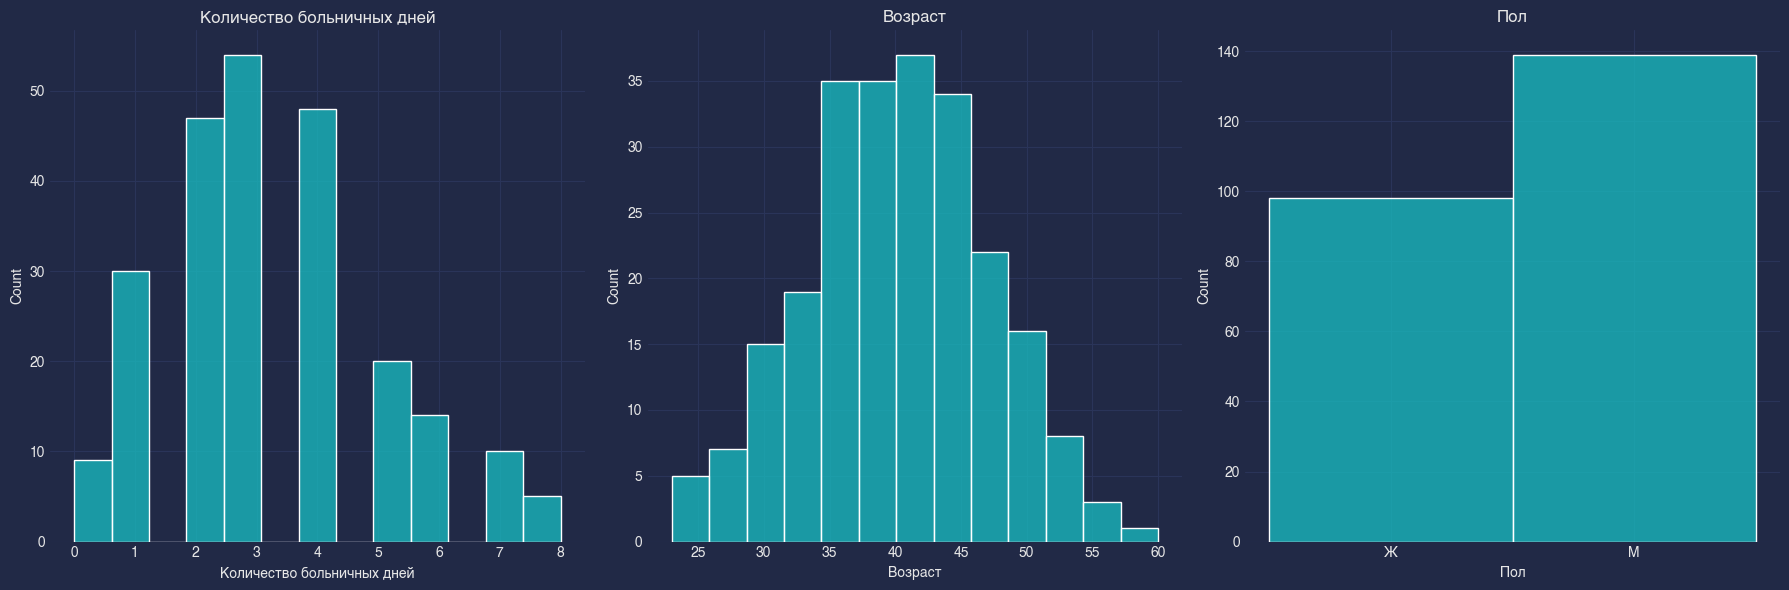

In [8]:
from funcs import histplots
    
histplots(df)

# Гипотеза 1

### H0
Мужчины и женщины пропускают более 2 рабочих дней по болезни с одинаковой частотой.

### H1
Мужчины пропускают более 2 рабочих дней по болезни значимо чаще женщин.

In [33]:
df['Прогульщики'] = df['Количество больничных дней'] > 2

Уже по графику видно, что H1 скорее всего не взлетит, но для верности сделаем тест, в качестве статистики выберем хи-квадрат, так как мы сравниваем частоты в категориальных признаках

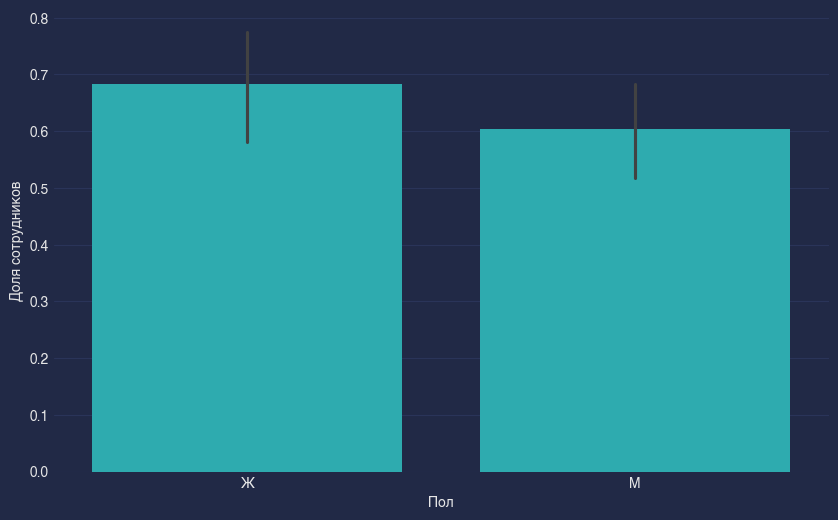

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Пол', y='Прогульщики', data=df, ax=ax)

ax.set_ylabel('Доля сотрудников')
ax.set_xlabel('Пол');

In [42]:
cross_gender = pd.crosstab(df['Пол'], df['Прогульщики'])
cross_gender

Прогульщики,False,True
Пол,,
Ж,31,67
М,55,84


Фиксируем альфу на привычных 5% и запускаем тестирование с Хи-квадрат статистикой

In [46]:
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(cross_gender)
print(f"Хи-квадрат: {chi2:.3f}, p-value: {p:.3f}")

Хи-квадрат: 1.241, p-value: 0.265


Итог: p-value существенно выше нашей альфы, отвергаем H1

# Гипотеза 2

### H0
Сотрудники в возрасте до 35 лет и старше 35 лет пропускают более 2 рабочих дней по болезни с одинаковой частотой.

### H1
Сотрудники старше 35 лет пропускают более 2 рабочих дней по болезни значимо чаще.

In [48]:
df['старше_35'] = df['Возраст'] > 35

По графику доли почти равны, проведем тест

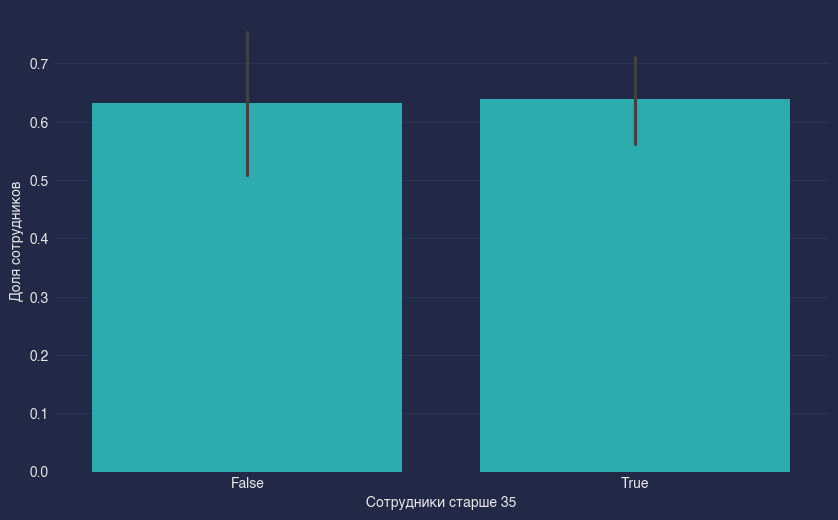

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='старше_35', y='Прогульщики', data=df, ax=ax)

ax.set_ylabel('Доля сотрудников')
ax.set_xlabel('Сотрудники старше 35');

In [54]:
cross_age = pd.crosstab(df['старше_35'], df['Прогульщики'])
cross_age

Прогульщики,False,True
старше_35,,
False,21,36
True,65,115


In [56]:
chi2, p, _, _ = chi2_contingency(cross_age)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 0.0, p-value: 1.0


Ну собственно p-value 1 говорит о том, что нет какой связи между пропусками и возрастом в 35 лет или ниже, поэтому отвергаем H1.